# <span style="font-width:bold; font-size: 3rem; color:#1EB182;"> **Air Quality** </span><span style="font-width:bold; font-size: 3rem; color:#333;">- Part 04: Batch Inference</span>

## 🗒️ This notebook is divided into the following sections:

1. Download model and batch inference data
2. Make predictions, generate PNG for forecast
3. Store predictions in a monitoring feature group adn generate PNG for hindcast

## <span style='color:#ff5f27'> 📝 Imports

In [1]:
import sys
from pathlib import Path

def is_google_colab() -> bool:
    if "google.colab" in str(get_ipython()):
        return True
    return False

def clone_repository() -> None:
    !git clone https://github.com/featurestorebook/mlfs-book.git
    %cd mlfs-book

def install_dependencies() -> None:
    !pip install --upgrade uv
    !uv pip install --all-extras --system --requirement pyproject.toml


if is_google_colab():
    clone_repository()
    install_dependencies()
    root_dir = str(Path().absolute())
    print("Google Colab environment")
else:
    root_dir = Path().absolute()
    # Strip ~/notebooks/ccfraud from PYTHON_PATH if notebook started in one of these subdirectories
    if root_dir.parts[-1:] == ('airquality',):
        root_dir = Path(*root_dir.parts[:-1])
    if root_dir.parts[-1:] == ('notebooks',):
        root_dir = Path(*root_dir.parts[:-1])
    root_dir = str(root_dir) 
    print("Local environment")

# Add the root directory to the `PYTHONPATH` to use the `recsys` Python module from the notebook.
if root_dir not in sys.path:
    sys.path.append(root_dir)
print(f"Added the following directory to the PYTHONPATH: {root_dir}")
    
# Read the API keys and configuration variables from the file <root_dir>/.env
from mlfs import config
settings = config.HopsworksSettings(_env_file=f"{root_dir}/.env")

Local environment
Added the following directory to the PYTHONPATH: /Users/sambarati/Documents/GitHub/mlfs-book
HopsworksSettings initialized!


In [2]:
import datetime
import pandas as pd
from xgboost import XGBRegressor
import hopsworks
import json
from mlfs.airquality import util
import os
import matplotlib.pyplot as plt

In [3]:
# Reload the util module to pick up any changes
import importlib
importlib.reload(util)

<module 'mlfs.airquality.util' from '/Users/sambarati/Documents/GitHub/mlfs-book/mlfs/airquality/util.py'>

In [4]:
today = datetime.datetime.now() - datetime.timedelta(0)
tomorrow = today + datetime.timedelta(days = 1)
today

datetime.datetime(2025, 11, 18, 11, 48, 3, 307053)

## <span style="color:#ff5f27;"> 📡 Connect to Hopsworks Feature Store </span>

In [5]:
project = hopsworks.login(engine="python")
fs = project.get_feature_store() 
secrets = hopsworks.get_secrets_api()

paris_location_str = secrets.get_secret("SENSOR_LOCATION_JSON").value
paris_location = json.loads(paris_location_str)
birmingham_sensors_str = secrets.get_secret("BIRMINGHAM_SENSOR_LOCATIONS").value
birmingham_sensors = json.loads(birmingham_sensors_str)
all_sensors = [paris_location] + birmingham_sensors

print(f"Running inference for {len(all_sensors)} sensors:")
for sensor in all_sensors:
    print(f"  - {sensor['city']}, {sensor['street']}")

2025-11-18 11:48:05,639 INFO: Initializing external client
2025-11-18 11:48:05,640 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-18 11:48:05,640 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-18 11:48:06,463 WARNING: UserWarning: The installed hopsworks client version 4.4.2 may not be compatible with the connected Hopsworks backend version 4.2.2. 
To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'

2025-11-18 11:48:06,463 WARNING: UserWarning: The installed hopsworks client version 4.4.2 may not be compatible with the connected Hopsworks backend version 4.2.2. 
To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'



2025-11-18 11:48:07,356 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1267871

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1267871
Running inference for 4 sensors:
  - Paris, Boulevard Peripherique Est
  - Birmingham, Birmingham A4540 Roadside
  - Birmingham, Birmingham Ladywood
  - Birmingham, Coventry Allesley
Running inference for 4 sensors:
  - Paris, Boulevard Peripherique Est
  - Birmingham, Birmingham A4540 Roadside
  - Birmingham, Birmingham Ladywood
  - Birmingham, Coventry Allesley


## <span style="color:#ff5f27;">🪝 Load Models and Run Inference for All Sensors</span>

We'll loop through each sensor and:
1. Load the corresponding model from registry
2. Fetch weather forecast data
3. Calculate lagged PM2.5 features
4. Generate predictions
5. Save plots and monitoring data


Processing: Paris - Boulevard Peripherique Est


Downloading: 0.000%|          | 0/527756 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/98246 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/19782 elapsed<00:00 remaining<?

Loaded model: air_quality_xgboost_modeliles)... DONE
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.86s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.86s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.11s) 
Insufficient historical data (2 days)
Generated 5 predictions
2025-11-18 11:48:36,386 WARNING: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.11s) 
Insufficient historical data (2 days)
Generated 5 predictions
2025-11-18 11:48:36,386 WARNING: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.



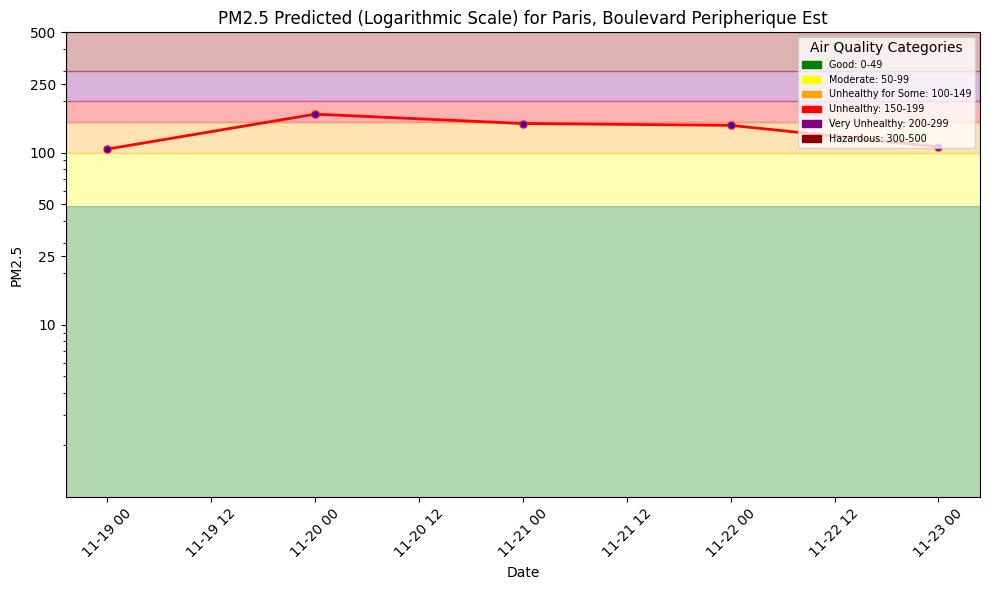

Saved forecast plot: /Users/sambarati/Documents/GitHub/mlfs-book/temp_predictions/pm25_forecast_paris_boulevard_peripherique_est.png


Uploading Dataframe: 100.00% |██████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00



Launching job: aq_predictions_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1267871/jobs/named/aq_predictions_2_offline_fg_materialization/executions
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1267871/jobs/named/aq_predictions_2_offline_fg_materialization/executions
2025-11-18 11:49:18,599 INFO: Waiting for execution to finish. Current state: INITIALIZING. Final status: UNDEFINED
2025-11-18 11:49:18,599 INFO: Waiting for execution to finish. Current state: INITIALIZING. Final status: UNDEFINED
2025-11-18 11:49:21,792 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-18 11:49:21,792 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-18 11:49:24,995 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-18 11:49:24,995 INFO: Waiting for 

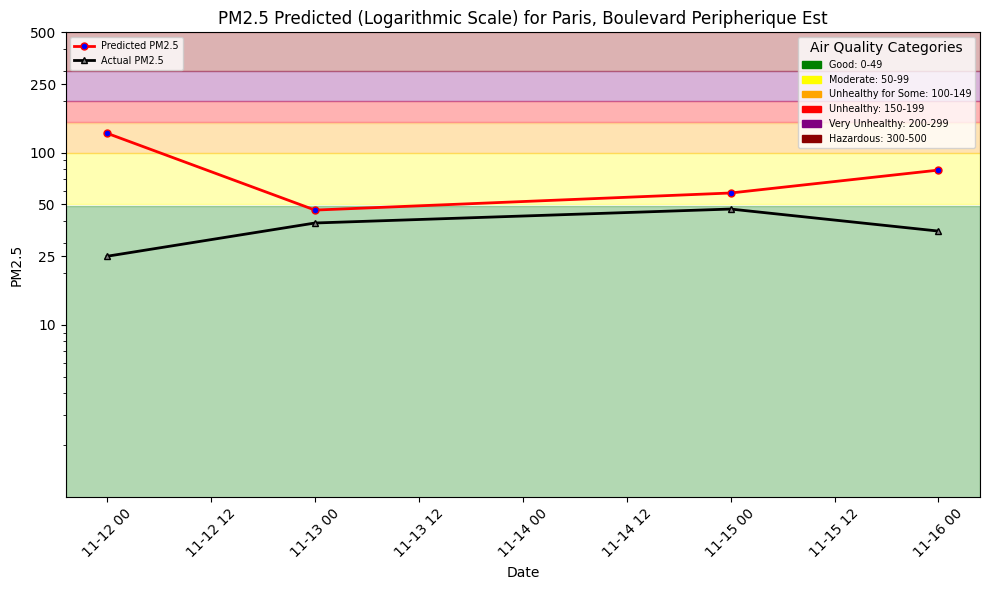

✓ Saved hindcast plot: /Users/sambarati/Documents/GitHub/mlfs-book/temp_predictions/pm25_hindcast_1day_paris_boulevard_peripherique_est.png


Uploading /Users/sambarati/Documents/GitHub/mlfs-book/temp_predictions/pm25_forecast_paris_boulevard_peripheri…

Uploading /Users/sambarati/Documents/GitHub/mlfs-book/temp_predictions/pm25_hindcast_1day_paris_boulevard_peri…

✓ Uploaded to Hopsworks

Processing: Birmingham - Birmingham A4540 Roadside


Downloading: 0.000%|          | 0/501846 elapsed<00:00 remaining<?

Loaded model: air_quality_birmingham_birmingham_a4540_roadside
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.54s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.54s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.56s) 
Insufficient historical data (2 days)
Generated 5 predictions
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.56s) 
Insufficient historical data (2 days)
Generated 5 predictions


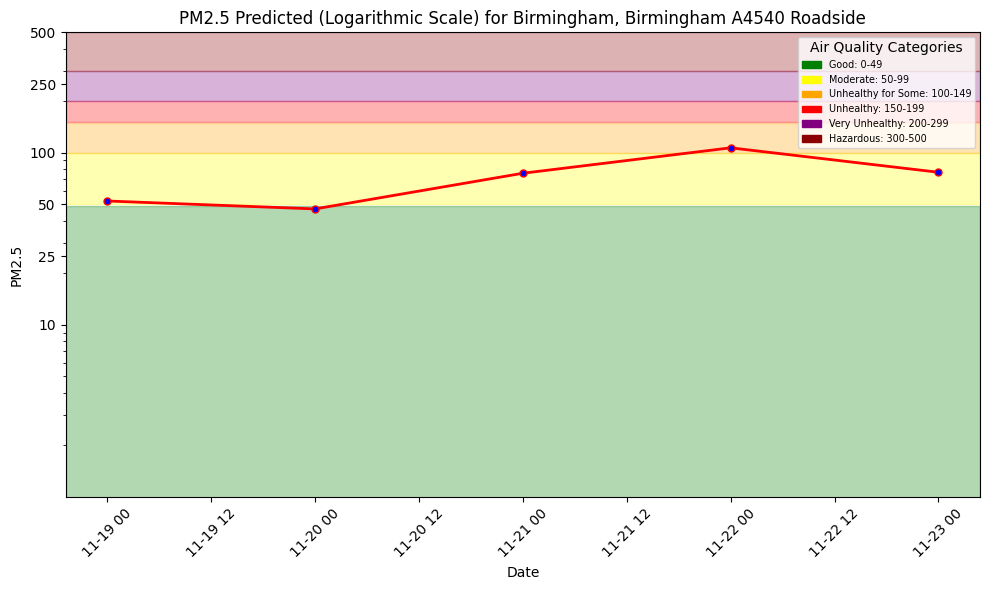

Saved forecast plot: /Users/sambarati/Documents/GitHub/mlfs-book/temp_predictions/pm25_forecast_birmingham_birmingham_a4540_roadside.png


Uploading Dataframe: 100.00% |██████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00



Launching job: aq_predictions_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1267871/jobs/named/aq_predictions_2_offline_fg_materialization/executions
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1267871/jobs/named/aq_predictions_2_offline_fg_materialization/executions
2025-11-18 11:52:16,992 INFO: Waiting for execution to finish. Current state: INITIALIZING. Final status: UNDEFINED
2025-11-18 11:52:16,992 INFO: Waiting for execution to finish. Current state: INITIALIZING. Final status: UNDEFINED
2025-11-18 11:52:20,248 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-18 11:52:20,248 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-18 11:53:49,265 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-18 11:53:49,265 INFO: Waiting

Traceback (most recent call last):
  File "/var/folders/2x/6wpkl49n4bsfkkvhr3gm3tt00000gn/T/ipykernel_86711/166287989.py", line 123, in <module>
    hindcast_df = util.backfill_predictions_for_monitoring(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sambarati/Documents/GitHub/mlfs-book/mlfs/airquality/util.py", line 360, in backfill_predictions_for_monitoring
    monitor_fg.insert(df, write_options={"wait_for_job": True})
  File "/Users/sambarati/Documents/GitHub/mlfs-book/.venv/lib/python3.12/site-packages/hsfs/feature_group.py", line 3153, in insert
    job, ge_report = self._feature_group_engine.insert(
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sambarati/Documents/GitHub/mlfs-book/.venv/lib/python3.12/site-packages/hsfs/core/feature_group_engine.py", line 209, in insert
    self._verify_schema_compatibility(
  File "/Users/sambarati/Documents/GitHub/mlfs-book/.venv/lib/python3.12/site-packages/hsfs/core/feature_group_base_en

Downloading: 0.000%|          | 0/492235 elapsed<00:00 remaining<?

Loaded model: air_quality_birmingham_birmingham_ladywood
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.56s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.56s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.60s) 
Insufficient historical data (2 days)
Generated 5 predictions
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.60s) 
Insufficient historical data (2 days)
Generated 5 predictions


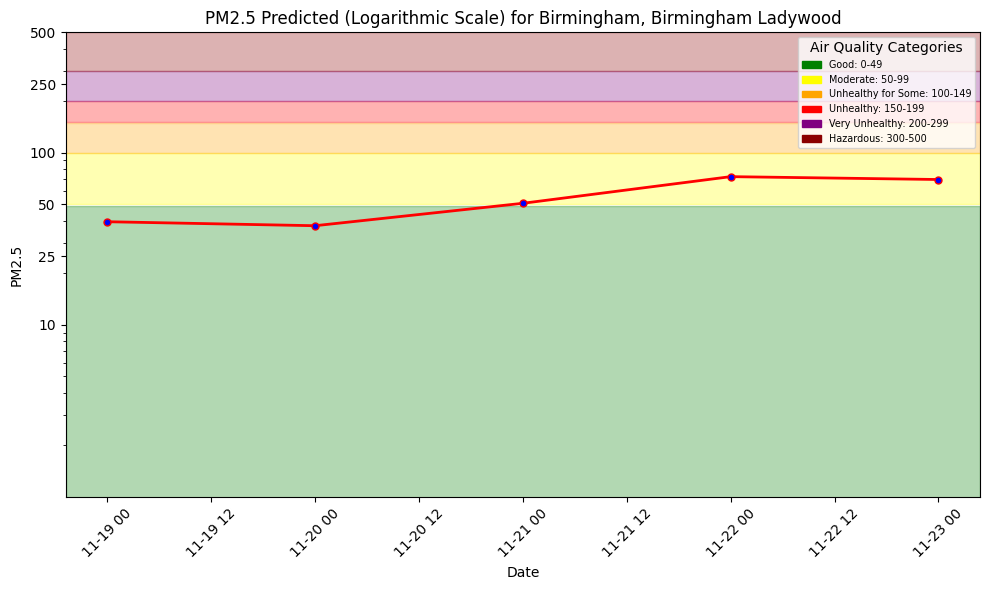

Saved forecast plot: /Users/sambarati/Documents/GitHub/mlfs-book/temp_predictions/pm25_forecast_birmingham_birmingham_ladywood.png


Uploading Dataframe: 100.00% |██████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00



Launching job: aq_predictions_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1267871/jobs/named/aq_predictions_2_offline_fg_materialization/executions
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1267871/jobs/named/aq_predictions_2_offline_fg_materialization/executions
2025-11-18 11:54:23,509 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-18 11:54:23,509 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-11-18 11:54:29,849 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-18 11:54:29,849 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-18 11:56:18,134 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-18 11:56:18,134 INFO: Waiting for e

Traceback (most recent call last):
  File "/var/folders/2x/6wpkl49n4bsfkkvhr3gm3tt00000gn/T/ipykernel_86711/166287989.py", line 123, in <module>
    hindcast_df = util.backfill_predictions_for_monitoring(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sambarati/Documents/GitHub/mlfs-book/mlfs/airquality/util.py", line 360, in backfill_predictions_for_monitoring
    monitor_fg.insert(df, write_options={"wait_for_job": True})
  File "/Users/sambarati/Documents/GitHub/mlfs-book/.venv/lib/python3.12/site-packages/hsfs/feature_group.py", line 3153, in insert
    job, ge_report = self._feature_group_engine.insert(
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sambarati/Documents/GitHub/mlfs-book/.venv/lib/python3.12/site-packages/hsfs/core/feature_group_engine.py", line 209, in insert
    self._verify_schema_compatibility(
  File "/Users/sambarati/Documents/GitHub/mlfs-book/.venv/lib/python3.12/site-packages/hsfs/core/feature_group_base_en

Downloading: 0.000%|          | 0/538080 elapsed<00:00 remaining<?

Loaded model: air_quality_birmingham_coventry_allesley
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.59s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.59s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.57s) 
Insufficient historical data (2 days)
Generated 5 predictions
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.57s) 
Insufficient historical data (2 days)
Generated 5 predictions


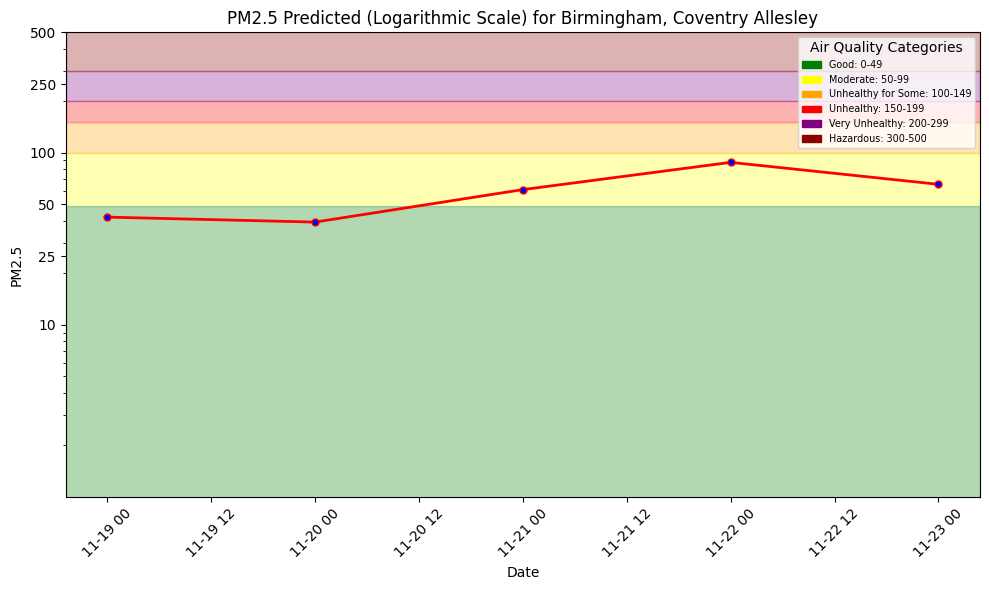

Saved forecast plot: /Users/sambarati/Documents/GitHub/mlfs-book/temp_predictions/pm25_forecast_birmingham_coventry_allesley.png


Uploading Dataframe: 100.00% |██████████| Rows 5/5 | Elapsed Time: 00:01 | Remaining Time: 00:00



Launching job: aq_predictions_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1267871/jobs/named/aq_predictions_2_offline_fg_materialization/executions
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1267871/jobs/named/aq_predictions_2_offline_fg_materialization/executions
2025-11-18 11:57:17,224 INFO: Waiting for execution to finish. Current state: INITIALIZING. Final status: UNDEFINED
2025-11-18 11:57:17,224 INFO: Waiting for execution to finish. Current state: INITIALIZING. Final status: UNDEFINED
2025-11-18 11:57:20,396 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-18 11:57:20,396 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-11-18 11:58:55,833 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-11-18 11:58:55,833 INFO: Waiting

Traceback (most recent call last):
  File "/var/folders/2x/6wpkl49n4bsfkkvhr3gm3tt00000gn/T/ipykernel_86711/166287989.py", line 123, in <module>
    hindcast_df = util.backfill_predictions_for_monitoring(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sambarati/Documents/GitHub/mlfs-book/mlfs/airquality/util.py", line 360, in backfill_predictions_for_monitoring
    monitor_fg.insert(df, write_options={"wait_for_job": True})
  File "/Users/sambarati/Documents/GitHub/mlfs-book/.venv/lib/python3.12/site-packages/hsfs/feature_group.py", line 3153, in insert
    job, ge_report = self._feature_group_engine.insert(
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sambarati/Documents/GitHub/mlfs-book/.venv/lib/python3.12/site-packages/hsfs/core/feature_group_engine.py", line 209, in insert
    self._verify_schema_compatibility(
  File "/Users/sambarati/Documents/GitHub/mlfs-book/.venv/lib/python3.12/site-packages/hsfs/core/feature_group_base_en

In [ ]:
SAVE_TO_GITHUB_PAGES = True

mr = project.get_model_registry()

weather_fg = fs.get_feature_group(name='weather', version=1)
air_quality_fg = fs.get_feature_group(name='air_quality', version=2)

monitor_fg = fs.get_or_create_feature_group(
    name='aq_predictions',
    description='Air Quality prediction monitoring',
    version=2,
    primary_key=['city','street','date','days_before_forecast_day'],
    event_time="date"
)

for sensor in all_sensors:
    city = sensor['city']
    street = sensor['street']
    country = sensor['country']
    version = 1
    
    print(f"\n{'='*60}")
    print(f"Processing: {city} - {street}")
    print(f"{'='*60}")
    
    if city != "Paris":
        model_name = f"air_quality_{city.lower().replace(' ', '_')}_{street.lower().replace(' ', '_')}"
    else:
        model_name = "air_quality_xgboost_model"
        version = 3
    
    try:
        retrieved_model = mr.get_model(name=model_name, version=version)
        saved_model_dir = retrieved_model.download()
        print(f"Loaded model: {model_name}")
        
        retrieved_xgboost_model = XGBRegressor()
        retrieved_xgboost_model.load_model(saved_model_dir + "/model.json")
        
        batch_data = weather_fg.filter(
            (weather_fg.date >= today) &
            (weather_fg.city == city)
        ).read()
        
        if len(batch_data) == 0:
            print(f"No weather forecast data found for {city}")
            continue
            
        three_days_ago = today - datetime.timedelta(days=3)
        historical_aq_df = air_quality_fg.filter(
            (air_quality_fg.date >= three_days_ago) & 
            (air_quality_fg.city == city) & 
            (air_quality_fg.street == street)
        ).read()
        
        historical_aq_df = historical_aq_df.sort_values(by='date')
        
        if len(historical_aq_df) >= 3:
            pm25_values = historical_aq_df['pm25'].tail(3).values
            batch_data['pm_25_1_day_lag'] = float(pm25_values[-1])
            batch_data['pm_25_2_day_lag'] = float(pm25_values[-2])
            batch_data['pm_25_3_day_lag'] = float(pm25_values[-3])
            print(f"Lagged features: {pm25_values[-1]:.2f}, {pm25_values[-2]:.2f}, {pm25_values[-3]:.2f}")
        else:
            print(f"Insufficient historical data ({len(historical_aq_df)} days)")
            batch_data['pm_25_1_day_lag'] = float('nan')
            batch_data['pm_25_2_day_lag'] = float('nan')
            batch_data['pm_25_3_day_lag'] = float('nan')
        
        feature_columns = [
            'pm_25_1_day_lag', 'pm_25_2_day_lag', 'pm_25_3_day_lag',
            'temperature_2m_mean', 'precipitation_sum', 
            'wind_speed_10m_max', 'wind_direction_10m_dominant'
        ]
        
        batch_data['predicted_pm25'] = retrieved_xgboost_model.predict(batch_data[feature_columns])
        print(f"Generated {len(batch_data)} predictions")
        
        batch_data['street'] = street
        batch_data['city'] = city
        batch_data['country'] = country
        batch_data['days_before_forecast_day'] = range(1, len(batch_data)+1)
        batch_data = batch_data.sort_values(by=['date'])
        
        safe_city = city.lower().replace(' ', '_')
        safe_street = street.lower().replace(' ', '_')
        
        if SAVE_TO_GITHUB_PAGES:
            pred_file_path = f"{root_dir}/docs/air-quality/assets/img/pm25_forecast_{safe_city}_{safe_street}.png"
            hindcast_file_path = f"{root_dir}/docs/air-quality/assets/img/pm25_hindcast_1day_{safe_city}_{safe_street}.png"
        else:
            temp_dir = f"{root_dir}/temp_predictions"
            os.makedirs(temp_dir, exist_ok=True)
            pred_file_path = f"{temp_dir}/pm25_forecast_{safe_city}_{safe_street}.png"
            hindcast_file_path = f"{temp_dir}/pm25_hindcast_1day_{safe_city}_{safe_street}.png"
        
        plt = util.plot_air_quality_forecast(city, street, batch_data, pred_file_path)
        plt.show()
        plt.close()
        print(f"Saved forecast plot: {pred_file_path}")
        
        monitor_fg.insert(batch_data, wait=True)
        print(f"Inserted predictions to monitoring feature group")
        
        monitoring_df = monitor_fg.filter(
            (monitor_fg.days_before_forecast_day == 1) &
            (monitor_fg.city == city) &
            (monitor_fg.street == street)
        ).read()
        
        air_quality_df = air_quality_fg.filter(
            (air_quality_fg.city == city) &
            (air_quality_fg.street == street)
        ).read()
        
        outcome_df = air_quality_df[['date', 'pm25']]
        preds_df = monitoring_df[['date', 'predicted_pm25']]
        
        hindcast_df = pd.merge(preds_df, outcome_df, on="date")
        hindcast_df = hindcast_df.sort_values(by=['date'])
        
        if len(hindcast_df) == 0:
            hindcast_df = util.backfill_predictions_for_monitoring(
                weather_fg, air_quality_df, monitor_fg, retrieved_xgboost_model
            )
        
        plt = util.plot_air_quality_forecast(city, street, hindcast_df, hindcast_file_path, hindcast=True)
        plt.show()
        plt.close()
        print(f"Saved hindcast plot: {hindcast_file_path}")
        
        dataset_api = project.get_dataset_api()
        str_today = today.strftime("%Y-%m-%d")
        if dataset_api.exists("Resources/airquality") == False:
            dataset_api.mkdir("Resources/airquality")
        dataset_api.upload(pred_file_path, f"Resources/airquality/{safe_city}_{safe_street}_{str_today}", overwrite=True)
        dataset_api.upload(hindcast_file_path, f"Resources/airquality/{safe_city}_{safe_street}_{str_today}", overwrite=True)
        print(f"Uploaded to Hopsworks")
        
    except Exception as e:
        print(f"✗ Error processing {city} - {street}: {str(e)}")
        import traceback
        traceback.print_exc()
        continue

proj_url = project.get_url()
print(f"\n{'='*60}")
print(f"All sensors processed!")
if SAVE_TO_GITHUB_PAGES:
    print(f"Images saved to: {root_dir}/docs/air-quality/assets/img/")
else:
    print(f"TEST MODE: Images saved to: {root_dir}/temp_predictions/")
    print(f"Set SAVE_TO_GITHUB_PAGES = True to save to GitHub Pages directory")
print(f"View in Hopsworks: {proj_url}/settings/fb/path/Resources/airquality")
print(f"{'='*60}")

---